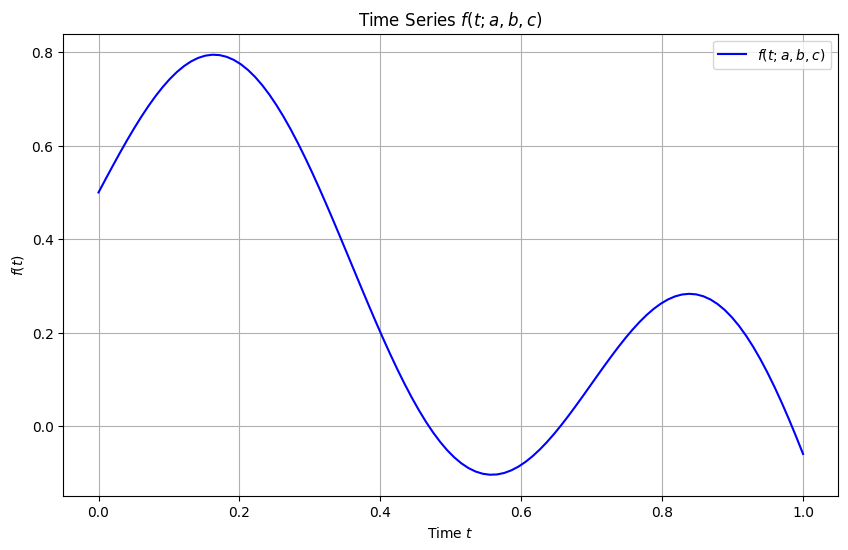

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Example usage
# Define parameters
a = 0.1
b = -0.13
c = 9


# Define time range
t = np.linspace(0, 1, 100)  # time from 0 to 1 with 100 points

# Calculate f(t) for these parameters
f_values = f(t, a, b, c)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Time Series $f(t; a, b, c)$')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
from ipywidgets import interactive
import ipywidgets as widgets


def plot_with_parameters(a, b, c):
    # Define time range
    t = np.linspace(0, 1, 100)

    # Calculate f(t) for these parameters
    f_values = f(t, a, b, c)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.1, value=9)
)

display(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), FloatSlider(value=-0.13, de…

#### It is useful to note the general properties of the function: it is the superposition of a cosine with an exponentially supressed sine.
#### The sqrt(a) is an overall factor on the sine term, so determines the amplitude of the contribution of this term to the cosine.
#### exp(-b*t) is the expl. supression
#### sin(c*t) changes the frequency 

## Question 1
### 1d interpolation

In [4]:
from scipy.interpolate import interp1d
t = np.linspace(0, 1, 100)
y = f(t, 0.1, -0.13, 9)
y_interp=interp1d(t, y, kind='linear')

## Question 2, 3

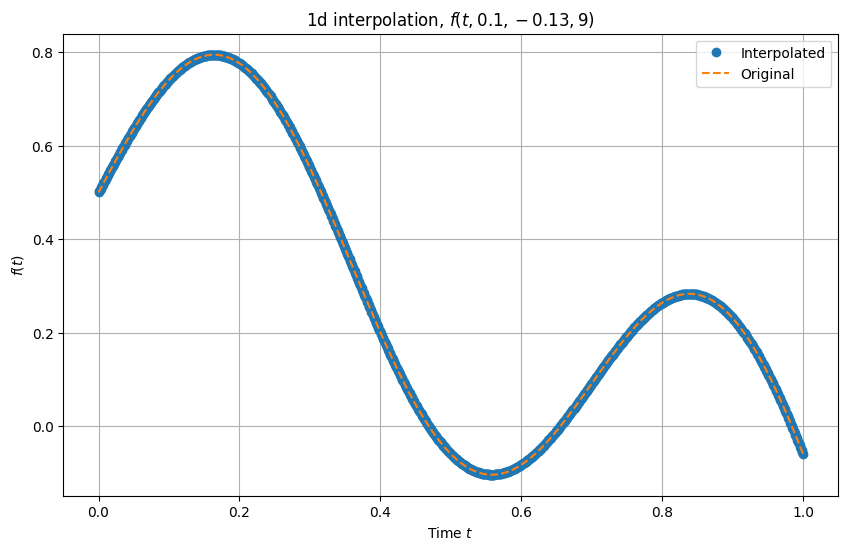

In [5]:
t_fine=np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))
plt.plot(t_fine, y_interp(t_fine), 'o', label='Interpolated')
plt.plot(t_fine, f(t_fine, 0.1, -0.13, 9), ls='--', label='Original')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'1d interpolation, $f(t, 0.1,-0.13, 9)$')
plt.legend()
plt.grid(True)
plt.show()


## Question 4

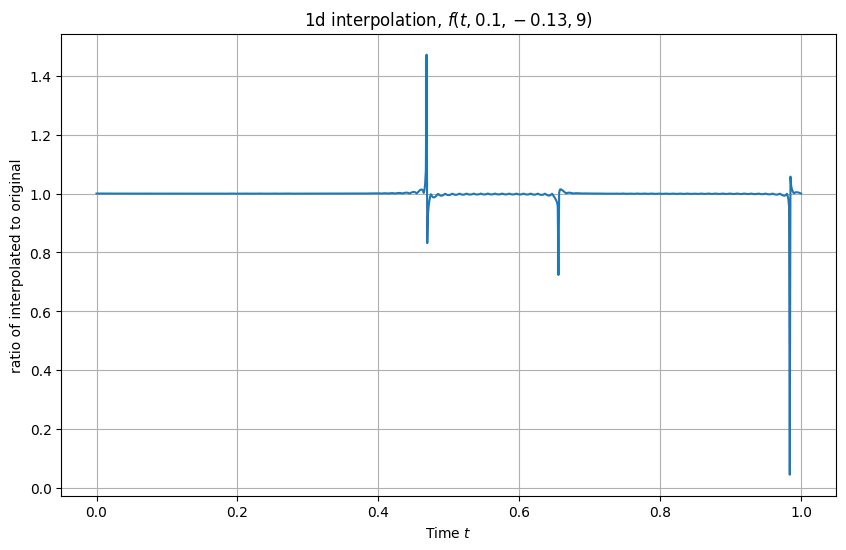

In [21]:
array1 = np.array(y_interp(t_fine))
array2 = np.array(f(t_fine, 0.1, -0.13, 9))

ratio=np.divide(array1, array2)

plt.figure(figsize=(10, 6))
plt.plot(t_fine, ratio)
plt.xlabel('Time $t$')
plt.ylabel('ratio of interpolated to original')
plt.title('1d interpolation, $f(t, 0.1,-0.13, 9)$')
plt.grid(True)
plt.show()

##### Note the ratio is close to one, as expected from a good interpolator and as shown by the previous graph. Note that the ratio peaks where the function is close to 0, which leads to division by small values near the roots.

## Question 5

In [7]:
al=np.linspace(0,1,10)
data = {}
for i in al:
    res=f(t, i, -0.13, 9) #generate a time-series for each value of a
    data[i]=res #store the time-series in a dictionary

import pandas as pd

df=pd.DataFrame(data) #convert the dictionary to a pandas dataframe
df.head() #display the first few rows of the dataframe

,0.000000,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1.000000
0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,0.499898,0.530199,0.542750,0.552381,0.560500,0.567653,0.574120,0.580067,0.585602,0.590801
2,0.499592,0.560023,0.585055,0.604262,0.620454,0.634720,0.647618,0.659478,0.670517,0.680886
3,0.499082,0.589223,0.626560,0.655210,0.679363,0.700643,0.719881,0.737572,0.754038,0.769504
4,0.498368,0.617551,0.666918,0.704799,0.736734,0.764869,0.790305,0.813696,0.835468,0.855917


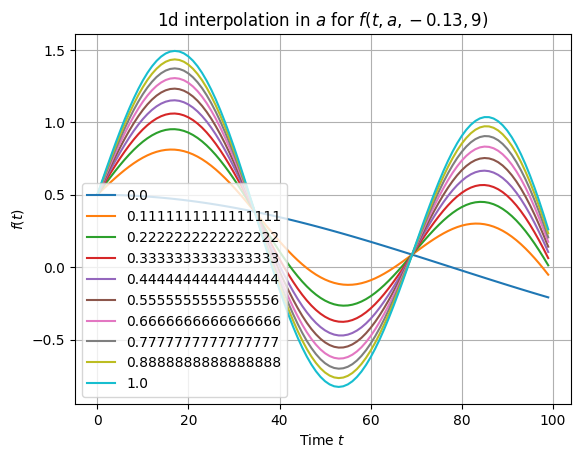

In [8]:
#plot the time-series for each value of a
df.plot()
#plt.figure(figsize=(10,6))
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'1d interpolation in $a$ for $f(t, a,-0.13, 9)$')
plt.legend()
plt.grid(True)
plt.show()

## Question 6

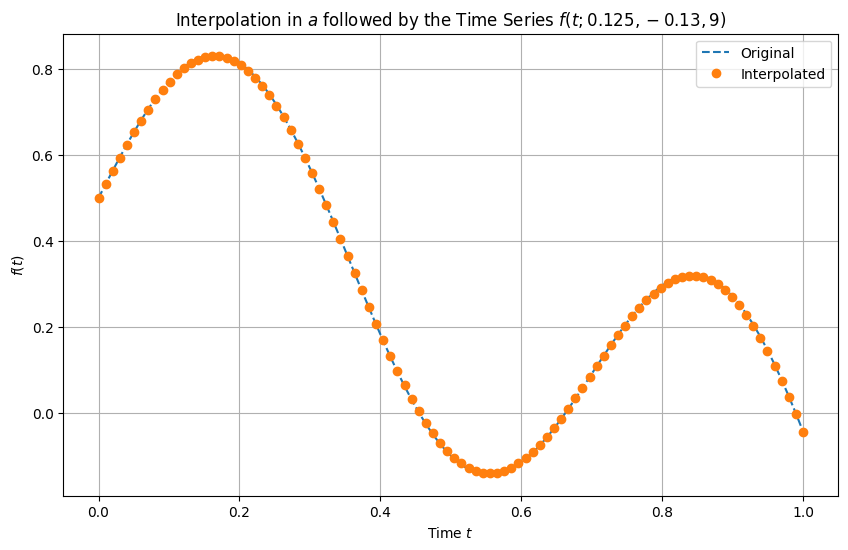

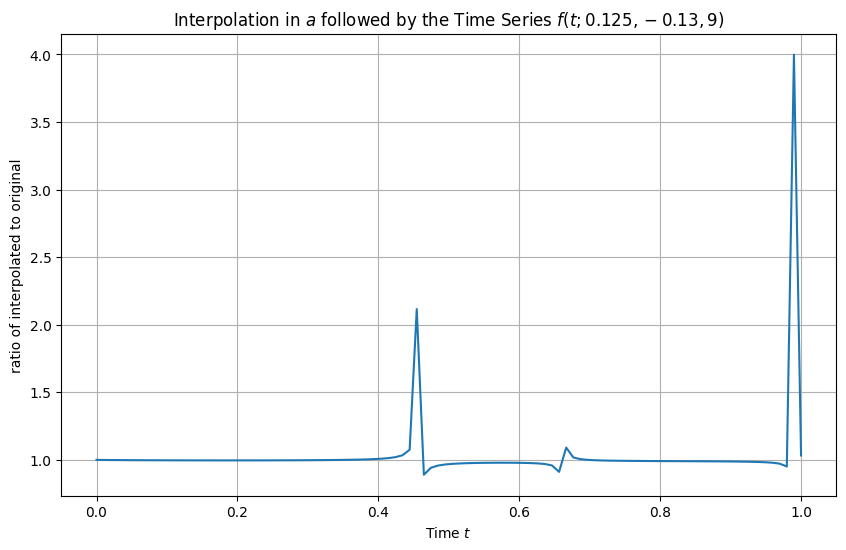

In [9]:
#interpolate the time-series for different values of a
y_interp_a=interp1d(al, df, kind='linear') 

#plot the interpolated time-series for a=0.125
plt.figure(figsize=(10, 6))
plt.plot(t, f(t, 0.125, -0.13, 9), ls='--', label='Original')
plt.plot(t, y_interp_a(0.125), 'o', label='Interpolated')
plt.xlabel(r'Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Interpolation in $a$ followed by the Time Series $f(t; 0.125, -0.13, 9)$')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the ratio of the interpolated time-series to the original time-series
numr_a = np.array(y_interp_a(0.125))
denr_a = np.array(f(t, 0.125, -0.13, 9))

ratio_a=np.divide(numr_a, denr_a)

plt.figure(figsize=(10, 6))
plt.plot(t, ratio_a)
plt.xlabel(r'Time $t$')
plt.ylabel('ratio of interpolated to original')
plt.title(r'Interpolation in $a$ followed by the Time Series $f(t; 0.125, -0.13, 9)$')
plt.grid(True)
plt.show()

## Question 7

In [10]:
def slider_a(a):
    # Define time range
    t = np.linspace(0, 1, 100)

    # Calculate f(t) for these parameters
    f_values = f(t, a, -0.13, 9)

    # Plot the true function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$Original$', ls='--', color='blue')
    # Plot the interpolated function
    plt.plot(t, y_interp_a(a), 'o', label='Interpolated')
    plt.xlabel(r'Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, -0.13, 9)$')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute the ratio of the interpolated to the original
    numr = np.array(y_interp_a(a))
    denr = np.array(f_values)
    ratio = np.divide(numr, denr)

    # Plot the ratio
    plt.figure(figsize=(10, 6)) 
    plt.plot(t, ratio)
    plt.xlabel(r'Time $t$')
    plt.ylabel('ratio of interpolated to original')
    plt.title(r'Time Series $f(t; a, -0.13, 9)$')
    plt.grid(True)
    plt.show()

    


# Create interactive widget
interactive_a = interactive(
    slider_a,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
)

display(interactive_a)

interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Question 8

##### Similar observations to Question 4. Note that the ratio is very large for a between 0 and 1 because the function changes shape very quickly here. Thus we also see the interpolator performing quite poorly here. 

## Question 9, 10

In [11]:
%%capture
# Install pyDOE package
%pip install pyDOE

In [12]:
# Generate 10**2 pairs of (a, b) using LHS

from pyDOE import *

lhs_samples=lhs(2, samples=100)
lhs_samples=np.array(lhs_samples)
lhs_samples[:][:,1]-=0.5


lhs_samples

array([[ 0.00379683, -0.18616992],
       [ 0.96844333,  0.2036337 ],
       [ 0.40541583, -0.47109725],
       [ 0.2455636 , -0.38893296],
       [ 0.75044485,  0.02672315],
       [ 0.89129895,  0.01598634],
       [ 0.63071033,  0.19622105],
       [ 0.49054431,  0.33081513],
       [ 0.95509474,  0.10702278],
       [ 0.12215417, -0.37298205],
       [ 0.77497414,  0.37957872],
       [ 0.68994123,  0.14910627],
       [ 0.52145226, -0.49148205],
       [ 0.98854208, -0.281644  ],
       [ 0.10289519, -0.06408069],
       [ 0.16165762,  0.2392916 ],
       [ 0.01005535,  0.27602911],
       [ 0.54716416,  0.07734929],
       [ 0.21157267,  0.2116978 ],
       [ 0.55649855,  0.09879899],
       [ 0.65688769,  0.04863051],
       [ 0.37338814, -0.39138208],
       [ 0.28757947, -0.0113471 ],
       [ 0.4118323 , -0.3100723 ],
       [ 0.7643232 ,  0.35046928],
       [ 0.43746792,  0.47678777],
       [ 0.70432238,  0.18586084],
       [ 0.84400751,  0.44515685],
       [ 0.61124476,

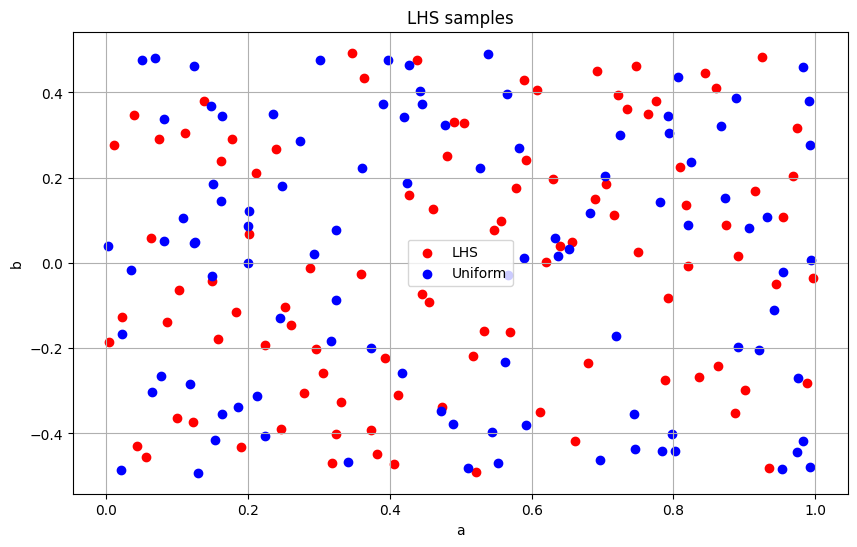

In [13]:
# Generate 100 uniformly sampled a,b pairs
column1 = np.random.uniform(low=0.0, high=1.0, size=100)
column2 = np.random.uniform(low=-0.5, high=0.5, size=100)
# Combine the columns into a single 2D array
unif_pairs = np.column_stack((column1, column2))

plt.figure(figsize=(10, 6))
# Plot the LHS samples
plt.scatter(lhs_samples[:,0], lhs_samples[:,1], color='red')
# Plot the uniformly sampled pairs
plt.scatter(unif_pairs[:,0], unif_pairs[:,1], color='blue')
plt.xlabel('a')
plt.ylabel('b')
plt.title('LHS samples')
plt.legend(['LHS', 'Uniform'])
plt.grid(True)

plt.show()






## Question 11

In [14]:
time = np.linspace(0, 1, 100)  # time from 0 to 1 with 100 points

# Meshgrid of the (a,b) pairs
a_grid, b_grid = np.meshgrid(lhs_samples[:][:,0], lhs_samples[:][:,1])

# Evaluate the function for each pair of (a,b) for each time point
values = np.array([f(t, a_grid, b_grid, 9) for t in time])
# values.shape=(100, 100, 100)

# Flatten the grid for use with griddata
points = np.array([a_grid.flatten(), b_grid.flatten()]).T
#a_flat.shape=(10000,)
#b_flat.shape=(10000,)

In [15]:
from scipy.interpolate import griddata

# Define new points where you want to interpolate
a_new = np.linspace(0, 1, 50)
b_new = np.linspace(-0.5, 0.5, 50)
a_new, b_new = np.meshgrid(a_new, b_new)
points_new = np.array([a_new.flatten(), b_new.flatten()]).T

# Interpolate with griddata
interpolated_values = np.array([griddata(points, values[i].flatten(), points_new, method='nearest') for i in range(100)])
# interpolated_values.shape = (100, 2500)

In [22]:
a_new.shape

(50, 50)

## Question 12

In [16]:
# Reshape the interpolated values to match the new grid
interpolated_values = np.array([interpolated_values[i].reshape(a_new.shape) for i in range(len(time))])
interpolated_values.shape

(100, 50, 50)

In [17]:
interpolated_values[:,0,5]

array([ 0.5       ,  0.52916392,  0.55817222,  0.58678148,  0.61474756,
        0.64182762,  0.66778215,  0.69237701,  0.71538545,  0.73659005,
        0.75578463,  0.7727761 ,  0.78738618,  0.79945307,  0.80883293,
        0.8154013 ,  0.8190543 ,  0.81970975,  0.81730805,  0.81181291,
        0.80321193,  0.79151691,  0.77676402,  0.75901377,  0.73835075,
        0.71488317,  0.68874223,  0.66008125,  0.62907464,  0.59591669,
        0.56082014,  0.52401462,  0.48574494,  0.44626919,  0.40585678,
        0.36478631,  0.32334334,  0.28181815,  0.24050336,  0.19969155,
        0.15967283,  0.12073245,  0.08314837,  0.04718892,  0.01311047,
       -0.01884476, -0.04845087, -0.07550031, -0.0998057 , -0.12120163,
       -0.1395462 , -0.15472244, -0.16663944, -0.17523341, -0.18046842,
       -0.18233696, -0.18086022, -0.17608825, -0.16809972, -0.15700158,
       -0.14292838, -0.12604142, -0.10652765, -0.08459831, -0.06048741,
       -0.03444998, -0.0067601 ,  0.02229121,  0.05239827,  0.08

In [18]:
def slider_ab(a, b):
    # Find the closest indices in the new parameter grid
    a_idx = (np.abs(np.linspace(0,1,50) - a)).argmin()
    b_idx = (np.abs(np.linspace(-0.5,0.5,50) - b)).argmin()
    
    # Extract the time series for the specific a and b
    time_series = interpolated_values[:, a_idx, b_idx]
    
    # Define time range
    t = np.linspace(0, 1, 100)

    # Calculate f(t) for these parameters
    f_values = f(t, a, b, 9)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, 9)$', color='blue')
    # Plot the interpolated function
    plt.plot(t, time_series, 'o', label='Interpolated')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, 9)$')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute the ratio of the interpolated to the original
    numr = np.array(time_series)
    denr = np.array(f_values)
    ratio = np.divide(numr, denr)

    # Plot the ratio
    plt.figure(figsize=(10, 6)) 
    plt.plot(t, ratio)
    plt.xlabel(r'Time $t$')
    plt.ylabel('ratio of interpolated to original')
    plt.title(r'Time Series $f(t; a, b, 9)$')
    plt.grid(True)
    plt.show()

# Create interactive widget
interactive_ab = interactive(
    slider_ab,
    a=widgets.FloatSlider(min=0, max=1, step=0.02, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.02, value=-0.13),
)

display(interactive_ab)


interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.02), FloatSlider(value=-0.13, de…

## Question 13

In [ ]:
pip install memory_profiler

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from memory_profiler import profile
# Use %%timeit to measure the time taken to run the function
#@profile
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

%time
t=np.linspace(0, 1, 100)
result=f(t, 0.1, -0.13, 9)

CPU times: total: 0 ns
Wall time: 0 ns
Filename: C:\Users\fayza\AppData\Local\Temp\ipykernel_7360\206256873.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3    185.8 MiB    185.8 MiB           1   @profile
     4                                         def f(t, a, b, c):
     5    185.8 MiB      0.0 MiB           1       return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)




In [32]:
@profile
def interpolated_profiling_2d(a,b):
    lhs_samples=lhs(2, samples=100)
    lhs_samples=np.array(lhs_samples)
    _=0.5*np.ones_like(lhs_samples)
    _[:][:,0]=0
    lhs_samples=lhs_samples-_

    time = np.linspace(0, 1, 100)  # time from 0 to 1 with 100 points

    # Meshgrid of the (a,b) pairs
    a_grid, b_grid = np.meshgrid(lhs_samples[:][:,0], lhs_samples[:][:,1])

    # Evaluate the function for each pair of (a,b) for each time point
    values = np.array([f(t, a_grid, b_grid, 9) for t in time])

    # Flatten the grid for use with griddata
    points = np.array([a_grid.flatten(), b_grid.flatten()]).T

    # Define new points where you want to interpolate
    a_new = np.linspace(0, 1, 50)
    b_new = np.linspace(-0.5, 0.5, 50)
    a_new, b_new = np.meshgrid(a_new, b_new)
    points_new = np.array([a_new.flatten(), b_new.flatten()]).T

    # Interpolate with griddata
    interpolated_values = np.array([griddata(points, values[i].flatten(), points_new, method='nearest') for i in range(100)])

    # Reshape the interpolated values to match the new grid
    interpolated_values = np.array([interpolated_values[i].reshape(a_new.shape) for i in range(len(time))])

    # Find the closest indices in the new parameter grid
    a_idx = (np.abs(np.linspace(0,1,50) - a)).argmin()
    b_idx = (np.abs(np.linspace(-0.5,0.5,50) - b)).argmin()

    # Extract the time series for the specific a and b
    time_series = interpolated_values[:, a_idx, b_idx]
    return time_series

%time
result=interpolated_profiling_2d(0.1,-0.13)

CPU times: total: 0 ns
Wall time: 0 ns
Filename: C:\Users\fayza\AppData\Local\Temp\ipykernel_7360\206256873.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3    184.0 MiB    184.0 MiB           1   @profile
     4                                         def f(t, a, b, c):
     5    184.0 MiB      0.0 MiB           1       return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)


Filename: C:\Users\fayza\AppData\Local\Temp\ipykernel_7360\206256873.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3    184.0 MiB    184.0 MiB           1   @profile
     4                                         def f(t, a, b, c):
     5    184.0 MiB      0.0 MiB           1       return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)


Filename: C:\Users\fayza\AppData\Local\Temp\ipykernel_7360\206256873.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3    184.0 MiB    184.0 MiB           1   @profile
    

## Question 14

In [46]:
# Generate 10**3 pairs of (a, b, c) using LHS and transform as required
from pyDOE import *

lhs_samples=lhs(3, samples=100)
lhs_samples=np.array(lhs_samples)
lhs_samples[:][:,1]-=0.5
lhs_samples[:][:,2]*=5
lhs_samples[:][:,2]+=5

# time from 0 to 1 with 100 points
time = np.linspace(0, 1, 100)  

# Meshgrid of the (a,b,c) pairs
a_grid, b_grid, c_grid = np.meshgrid(lhs_samples[:][:,0], lhs_samples[:][:,1], lhs_samples[:][:,2])

# Evaluate the function for each pair of (a,b,c) for each time point
values = np.array([f(t, a_grid, b_grid, c_grid) for t in time])
# values.shape=(100, 100, 100, 100)

# Flatten the grid for use with griddata
points = np.array([a_grid.flatten(), b_grid.flatten(), c_grid.flatten()]).T
#a_flat.shape=(10000,)
#b_flat.shape=(10000,)
#c_flat.shape=(10000,)

from scipy.interpolate import griddata

# Define new points where you want to interpolate
a_new = np.linspace(0, 1, 50)
b_new = np.linspace(-0.5, 0.5, 50)
c_new = np.linspace(5, 10, 50)
a_new, b_new, c_new = np.meshgrid(a_new, b_new, c_new)
points_new = np.array([a_new.flatten(), b_new.flatten(), c_new.flatten()]).T

# Interpolate with griddata
interpolated_values = np.array([griddata(points, values[i].flatten(), points_new, method='nearest') for i in range(100)])
interpolated_values.shape

Filename: C:\Users\fayza\AppData\Local\Temp\ipykernel_7360\206256873.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3    633.6 MiB    633.6 MiB           1   @profile
     4                                         def f(t, a, b, c):
     5    641.4 MiB      7.8 MiB           1       return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)


Filename: C:\Users\fayza\AppData\Local\Temp\ipykernel_7360\206256873.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3    641.5 MiB    641.5 MiB           1   @profile
     4                                         def f(t, a, b, c):
     5    649.2 MiB      7.6 MiB           1       return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)


Filename: C:\Users\fayza\AppData\Local\Temp\ipykernel_7360\206256873.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3    649.2 MiB    649.2 MiB           1   @profile
     4                                     

(100, 125000)

In [47]:
# Reshape the interpolated values to match the new grid
interpolated_values = np.array([interpolated_values[i].reshape(a_new.shape) for i in range(len(time))])
interpolated_values.shape

(100, 50, 50, 50)

In [48]:
def slider_abc(a, b, c):
    # Find the closest indices in the new parameter grid
    a_idx = (np.abs(np.linspace(0,1,50) - a)).argmin()
    b_idx = (np.abs(np.linspace(-0.5,0.5,50) - b)).argmin()
    c_idx = (np.abs(np.linspace(5,10,50) - c)).argmin()

    # Extract the time series for the specific a, b, c
    time_series = interpolated_values[:, a_idx, b_idx, c_idx]
    
    # Define time range
    t = np.linspace(0, 1, 100)

    # Calculate f(t) for these parameters
    f_values = f(t, a, b, c)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    # Plot the interpolated function
    plt.plot(t, time_series, 'o', label='Interpolated')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute the ratio of the interpolated to the original
    numr = np.array(time_series)
    denr = np.array(f_values)
    ratio = np.divide(numr, denr)

    # Plot the ratio
    plt.figure(figsize=(10, 6)) 
    plt.plot(t, ratio)
    plt.xlabel(r'Time $t$')
    plt.ylabel('ratio of interpolated to original')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.grid(True)
    plt.show()

# Create interactive widget
interactive_abc = interactive(
    slider_abc,
    a=widgets.FloatSlider(min=0, max=1, step=0.02, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.02, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.02, value=9),
)

display(interactive_abc)


interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.02), FloatSlider(value=-0.13, de…